In [33]:
import pandas as pd
from io import StringIO
import numpy as np

In [34]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [35]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [36]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)  # L1 regularizatoin
lr.fit(X_train_std, y_train)
lr.coef_

array([[ 1.24651242,  0.18001777,  0.74655667, -1.1644603 ,  0.        ,
         0.        ,  1.15881183,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55777433,  2.50840353],
       [-1.53740024, -0.3871954 , -0.99529746,  0.36502145, -0.05963452,
         0.        ,  0.66816992,  0.        ,  0.        , -1.9344061 ,
         1.23361096,  0.        , -2.23176623],
       [ 0.13564772,  0.16862627,  0.35736288,  0.        ,  0.        ,
         0.        , -2.43683976,  0.        ,  0.        ,  1.56313265,
        -0.8187583 , -0.49338055,  0.        ]])

In [38]:
lr2 = LogisticRegression(penalty='l2', C=1.0)  # L2 regularizatoin
lr2.fit(X_train_std, y_train)
lr2.coef_

array([[ 1.27713853,  0.38210274,  0.8015599 , -1.30842842,  0.22782837,
         0.23101419,  0.90234371, -0.08423823,  0.01462196, -0.0312838 ,
         0.02796323,  0.71703048,  1.79262118],
       [-1.45395571, -0.620303  , -1.05445248,  0.67148394, -0.29048951,
         0.18277571,  0.51163918,  0.10789643,  0.08199321, -1.61228834,
         0.88800662,  0.1659356 , -1.73246957],
       [ 0.38965148,  0.4083047 ,  0.40211468,  0.26242969,  0.15288658,
        -0.20064653, -1.38792256, -0.06305419, -0.28440345,  1.2553389 ,
        -0.93849662, -0.83821807,  0.13754706]])

## plotting L2 regularized coef 

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

## plot 색 지정
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

### 학습되는 weights와 regularization parameter

In [40]:
weights, params = [], []
for c in np.arange(-3., 6.):
    lr3 = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr3.fit(X_train_std, y_train)
    weights.append(lr3.coef_[1])
    params.append(10**c)

weights = np.array(weights)

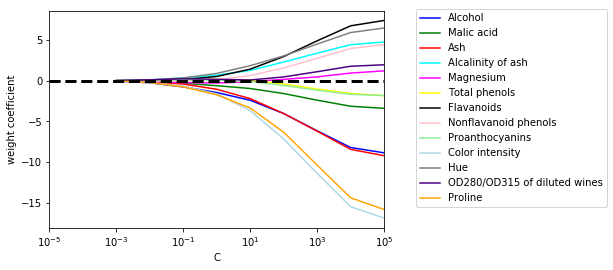

In [41]:
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

In [43]:
from sklearn.feature_selection import SelectPercentile

rng = np.random.RandomState(42)

noise_train = rng.normal(size=(len(X_train_std), 15))
noise_test = rng.normal(size=(len(X_test_std), 15))
X_train_noise = np.hstack([X_train_std, noise_train])
X_test_noise = np.hstack([X_test_std, noise_test])

## SelectPercentile의 숫자변화에 따른 성능비교

## X_test_noise를 transform하는 것이 맞나?
이거 성능 score만들어야 함. 이거 포함시켜서 for문으로 짧게 비교하자. 

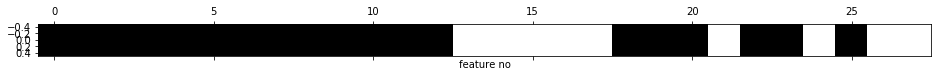

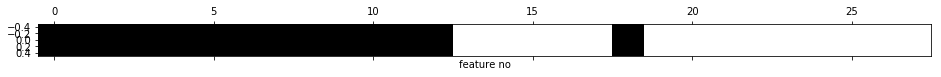

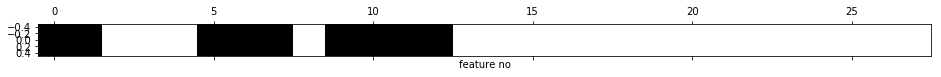

In [59]:

# 70%
select = SelectPercentile(percentile=70)  # 50%의 feature만 남긴다.
select.fit(X_train_noise, y_train)
X_test_selected = select.transform(X_test_noise)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")

# 50%
select = SelectPercentile(percentile=50)  # 50%의 feature만 남긴다.
select.fit(X_train_noise, y_train)
X_test_selected = select.transform(X_test_noise)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")

# 30%
select = SelectPercentile(percentile=30)  # 50%의 feature만 남긴다.
select.fit(X_train_noise, y_train)
X_test_selected = select.transform(X_test_noise)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature no")

plt.show()


## SelectKBest를 이용한 성능 비교

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
for number in [20, 10, 5]:
    selector  = SelectKBest(f_classif, k=number)
    selector.fit(X_train_noise, y_train)
    X_test = selector.transform(X_test_noise)
    lr = LogisticRegression()
    lr.fit(X_test, y_test)
    print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))


선택된 일부 특성을 사용한 점수: 1.000
선택된 일부 특성을 사용한 점수: 1.000
선택된 일부 특성을 사용한 점수: 0.981


## 각 모형으로 얻어진 성능 비교한 표를 작성하기 (accuracy)